In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler


In [2]:
# Step 1: Load the datasets
customers = pd.read_csv("C:/Users/NELAKURTHI MANOJ/Downloads/Customers.csv")
products = pd.read_csv("C:/Users/NELAKURTHI MANOJ/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/NELAKURTHI MANOJ/Downloads/Transactions.csv")

In [3]:
# Step 2: Explore the datasets
print("\nCustomers Dataset Info:\n")
print(customers.info())
print(customers.head())


Customers Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [4]:
print("\nProducts Dataset Info:\n")
print(products.info())
print(products.head())


Products Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [5]:
print("\nTransactions Dataset Info:\n")
print(transactions.info())
print(transactions.head())


Transactions Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070   

In [6]:
# Step 3: Check for missing values
print("\nMissing Values in Customers:\n", customers.isnull().sum())
print("\nMissing Values in Products:\n", products.isnull().sum())
print("\nMissing Values in Transactions:\n", transactions.isnull().sum())


Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
# Step 4: Basic statistics
print("\nSummary Statistics for Customers:\n")
print(customers.describe())
print("\nSummary Statistics for Products:\n")
print(products.describe())
print("\nSummary Statistics for Transactions:\n")
print(transactions.describe())


Summary Statistics for Customers:

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Summary Statistics for Products:

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Summary Statistics for Transactions:

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [8]:
# Clean and preprocess data
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions= transactions.rename(columns={"Price": "TransactionPrice"})
products = products.rename(columns={"Price_y": "ProductPrice"})


In [9]:
# Merge data for analysis
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

In [10]:
# Aggregated features for clustering
cluster_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionPrice': 'mean'
}).reset_index()


In [11]:
# Normalize data
scaler = StandardScaler()
scaled_cluster_data = scaler.fit_transform(cluster_data.iloc[:, 1:])

In [12]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_cluster_data)
cluster_data['Cluster'] = clusters

c:\Users\NELAKURTHI MANOJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
# Evaluate clusters
db_index = davies_bouldin_score(scaled_cluster_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.1218019122669298


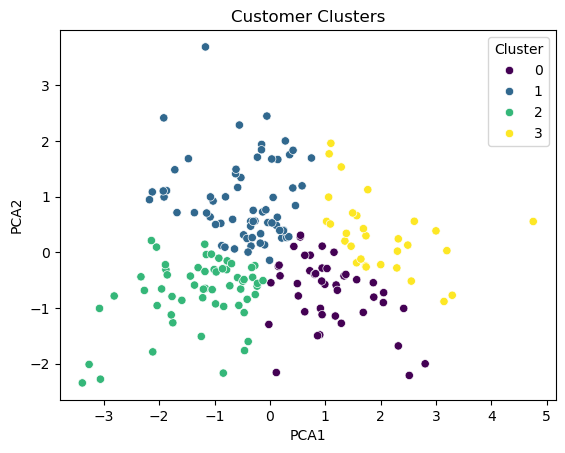

In [14]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_cluster_data)
cluster_data['PCA1'] = pca_data[:, 0]
cluster_data['PCA2'] = pca_data[:, 1]
sns.scatterplot(data=cluster_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Clusters')
plt.show()